<a href="https://colab.research.google.com/github/yingzibu/PBPK/blob/main/MSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mahalanobis-Distance (MSD)

Tsong, Yi, et al. "Statistical assessment of mean differences between two dissolution data sets." Drug Information Journal 30.4 (1996): 1105-1112.

https://search.r-project.org/CRAN/refmans/disprofas/html/mimcr.html


http://forum.bebac.at/mix_entry.php?id=12382

## Single time point dissolution value

For most IR drug products, the dissolution is rapid and the quality control dissolution requirement is only a single time point.


12 tablets of test and reference:

In [2]:
import pandas as pd
import numpy as np
import scipy.stats
test_batch = [76.5, 79.6, 82.1, 78.9, 81.5, 77.6, 79.8, 83.4, 80.2, 75.8, 81.2, 80.5]
ref_batch  = [85.3, 83.5, 82.5, 81.4, 84.4, 79.0, 80.5, 78.5, 85.3, 81.5, 79.9, 83.2]
assert len(test_batch) == len(ref_batch)

In [3]:

# Should not use np.std default
def cal_std(l:list):
    mean_ = np.mean(l)
    # len_ = len(l)
    temp_list = [(i-mean_ )**2 for i in l]
    std_ = np.sqrt(sum(temp_list)/(len(l)-1))
    return std_

test_mean = np.mean(test_batch)
test_std  = np.std(test_batch, ddof=1)

ref_mean  = np.mean(ref_batch)
ref_std   = np.std(ref_batch, ddof=1)
test_mean, test_std

(79.75833333333334, 2.2625240665051845)

In [4]:
D = np.abs(ref_mean-test_mean)
stderr_D = np.sqrt((ref_std**2 + test_std**2)/(len(test_batch)-1))
freedom = 2 * len(test_batch) - 2

stderr_D

0.980073505985641

t 95 22 = 1.717 check t distribution table

The 90% confidence interval of D would be the interval that contains all the differences $\mu_1 - \mu_2$ such that

$$|\frac{\mu_1 - \mu_2 - D}{stderr(d)}| \leq t22.95$$

In [5]:
t = 1.717
L90 = D - t * stderr_D
U90 = D + t * stderr_D

L90, U90

(0.642213790222643, 4.0077862097773345)

## Multiple time point dissolution

In [6]:
ref_df = pd.DataFrame()
ref_df['5'] = pd.DataFrame([42.06, 44.16, 45.63, 48.52, 50.49, 49.77])
ref_df['10'] = pd.DataFrame([59.91, 60.18, 55.77, 60.39, 61.82, 62.73])
ref_df['15'] = pd.DataFrame([65.58, 67.17, 65.56, 66.51, 69.06, 69.77])
ref_df['20'] = pd.DataFrame([71.81, 70.82, 70.50, 73.06, 72.85, 72.88])
ref_df['30'] = pd.DataFrame([77.77, 76.11, 76.92, 78.54, 78.99, 80.18])
ref_df['60'] = pd.DataFrame([85.67, 83.27, 83.91, 84.99, 86.86, 84.20])
ref_df['90'] = pd.DataFrame([93.14, 88.01, 86.83, 88.00, 89.70, 88.88])
ref_df['120'] = pd.DataFrame([94.23, 89.59, 90.12, 93.43, 90.79, 90.47])
ref_df, ref_df.mean(axis=0)

(       5     10     15     20     30     60     90    120
 0  42.06  59.91  65.58  71.81  77.77  85.67  93.14  94.23
 1  44.16  60.18  67.17  70.82  76.11  83.27  88.01  89.59
 2  45.63  55.77  65.56  70.50  76.92  83.91  86.83  90.12
 3  48.52  60.39  66.51  73.06  78.54  84.99  88.00  93.43
 4  50.49  61.82  69.06  72.85  78.99  86.86  89.70  90.79
 5  49.77  62.73  69.77  72.88  80.18  84.20  88.88  90.47,
 5      46.771667
 10     60.133333
 15     67.275000
 20     71.986667
 30     78.085000
 60     84.816667
 90     89.093333
 120    91.438333
 dtype: float64)

In [7]:
test_df = pd.DataFrame()
test_df['5'] = pd.DataFrame([19.99, 22.08, 21.93, 22.44, 25.67, 26.37])
test_df['10'] = pd.DataFrame([36.70, 39.29, 38.54, 38.46, 42.35, 41.34])
test_df['15'] = pd.DataFrame([47.77, 49.46, 47.76, 49.72, 52.68, 51.01])
test_df['20'] = pd.DataFrame([55.08, 56.79, 55.14, 58.67, 59.71, 57.75])
test_df['30'] = pd.DataFrame([65.69, 67.22, 65.25, 69.21, 71.51, 69.44])
test_df['60'] = pd.DataFrame([81.37, 82.42, 83.49, 84.93, 86.61, 85.90])
test_df['90'] = pd.DataFrame([92.39, 89.93, 90.19, 94.12, 93.80, 94.45])
test_df['120'] = pd.DataFrame([97.10, 95.62, 95.62, 95.51, 96.70, 98.07])
test_df, test_df.mean(axis=0)

(       5     10     15     20     30     60     90    120
 0  19.99  36.70  47.77  55.08  65.69  81.37  92.39  97.10
 1  22.08  39.29  49.46  56.79  67.22  82.42  89.93  95.62
 2  21.93  38.54  47.76  55.14  65.25  83.49  90.19  95.62
 3  22.44  38.46  49.72  58.67  69.21  84.93  94.12  95.51
 4  25.67  42.35  52.68  59.71  71.51  86.61  93.80  96.70
 5  26.37  41.34  51.01  57.75  69.44  85.90  94.45  98.07,
 5      23.080000
 10     39.446667
 15     49.733333
 20     57.190000
 30     68.053333
 60     84.120000
 90     92.480000
 120    96.436667
 dtype: float64)

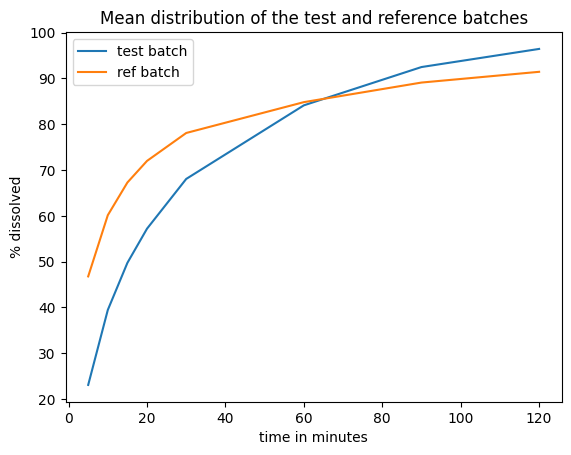

In [8]:
import matplotlib.pyplot as plt

x_axis = [int(i) for i in list(ref_df.columns)]
test_axis = list(test_df.mean(axis=0))
ref_axis = list(ref_df.mean(axis=0))
plt.plot(x_axis, test_axis, label='test batch')
plt.plot(x_axis, ref_axis, label='ref batch')
plt.xlabel('time in minutes')
plt.ylabel('% dissolved')
plt.title('Mean distribution of the test and reference batches')
plt.legend()
plt.show()
plt.close()

### comparing 15min and 90 min sample time points only

In [9]:
time_points = ['15', '90']
P = len(time_points) # there are a total of 6 time points, but we only compare 2 time points
n = len(ref_df) # how many samples, here 6 tablets
S1 = ref_df.cov()
S2 = test_df.cov()
S_pooled = (S1 + S2) / 2
S_pooled

,5,10,15,20,30,60,90,120
5,8.600908,4.448457,4.344905,3.004123,4.254885,2.981463,0.036347,-0.229818
10,4.448457,5.012247,3.535987,2.515637,3.282827,2.377407,1.777713,0.576357
15,4.344905,3.535987,3.395808,2.233850,3.157388,1.895300,1.029870,-0.396778
20,3.004123,2.515637,2.233850,2.396693,2.949900,2.064523,1.583467,0.514407
30,4.254885,3.282827,3.157388,2.949900,4.011988,2.617250,2.105510,0.610332
60,2.981463,2.377407,1.895300,2.064523,2.617250,2.940193,2.250947,0.894497
90,0.036347,1.777713,1.029870,1.583467,2.105510,2.250947,4.434833,1.985733
120,-0.229818,0.576357,-0.396778,0.514407,0.610332,0.894497,1.985733,2.364222


However, in the R reference
$S_{pooled} = \frac{(n_R-1)S_R + (n_T-1)S_T}{n_R + n_T -2}$

In [10]:
x2_x1 = list(test_df.mean(axis=0)[time_points] - ref_df.mean(axis=0)[time_points])
a = np.array(x2_x1).reshape(len(time_points),1)

In [11]:
K = n**2/(2*n)* (2*n - P - 1) / ((2*n - 2) * P)
K

1.35

F distribution with degrees P and 2n-P-1, 90 percentile

In [12]:
# F_2_9_90 = 3.0065

# Determine the F critical value
Fcrit = scipy.stats.f.ppf(q=1-.1, dfn=P, dfd=2*n-P-1)

In [13]:
spinv = np.linalg.inv(S_pooled.loc[time_points , time_points])
D_M = np.sqrt(a.T @ spinv @ a)[0][0]
D_M

10.440448914919306

In [14]:
# Assume tolerance is 15%

D_g = np.array([15] * len(time_points)).reshape(len(time_points), 1)
RD = np.sqrt(D_g.T @ spinv @ D_g)[0][0]
RD

9.630776502154019

$CR = K(y-a)^\top S_{pooled}^{-1} (y-a) \leq F$, a is the test-ref difference

let $M = S^{-1}_{pooled}$

the aim is to calculate the upper and lower bound for $\sqrt{ y^\top M y}$,
which is the same as to find the optimum for $y^\top M y$

Use Lagrange Multiplier method:

\begin{aligned}
    L(y, \lambda) &= y^\top M y - \lambda ((y-a)^\top M (y-a) - F/K) \\
    \frac{\partial L}{\partial y} & = 2 M y - \lambda (2My-2Ma) = 0 \\
    y & = \frac{\lambda a}{\lambda - 1} = (1 + \frac{1}{\lambda - 1})a  
\end{aligned}
Apply back to CR equation
\begin{aligned}
    y - a & = \frac{1}{\lambda - 1} a \\
    (\frac{1}{\lambda - 1} a)^\top M \frac{1}{\lambda - 1} a & = \frac{F}{K} \\
    (\frac{1}{\lambda - 1})^2 a^\top M a &= \frac{F}{K} \\
    \frac{1}{\lambda - 1} & = \pm \sqrt{\frac{F}{Ka^\top Ma}} \\
    then \quad y & = a(1 \pm \sqrt{\frac{F}{Ka^\top Ma}})  
\end{aligned}
which is the bound1 and bound2 calculated below

In [17]:
bound1 = a @ (1 + np.sqrt(Fcrit/(K * a.T @ spinv @ a)))
bound2 = a @ (1 - np.sqrt(Fcrit/(K * a.T @ spinv @ a)))
# 90% CI of Mahalanobis distance:
DM_1 = np.sqrt(bound1.T @ spinv @ bound1)[0][0]
DM_2 = np.sqrt(bound2.T @ spinv @ bound2)[0][0]
print('lower and uper bound of DM:', DM_1, DM_2)
DM_upper = max(DM_1, DM_2)
if DM_upper <= RD:
    print('Similar')
else:
    print('not similar')

lower and uper bound of DM: 11.932763154838922 8.948134674999688
not similar


### Comparing all eight time points

In [28]:

time_points = list(ref_df.columns)
P = len(time_points)
n = len(ref_df)
S1 = ref_df.cov()
S2 = test_df.cov()
S_pooled = (S1 + S2) / 2
x2_x1 = list(test_df.mean(axis=0)[time_points] - ref_df.mean(axis=0)[time_points])
a = np.array(x2_x1).reshape(len(time_points), 1)
K = n**2/(2*n)* (2*n - P - 1) / ((2*n - 2) * P)
Fcrit = scipy.stats.f.ppf(q=1-.1, dfn=P, dfd=2*n-P-1)
spinv = np.linalg.inv(S_pooled.loc[time_points , time_points])
D_M = np.sqrt(a.T @ spinv @ a)[0][0]
print('Mahalanobis distance between T and R:', D_M)


bound1 = a @ (1 + np.sqrt(Fcrit/(K * a.T @ spinv @ a)))
bound2 = a @ (1 - np.sqrt(Fcrit/(K * a.T @ spinv @ a)))
# 90% CI of Mahalanobis distance:
DM_1 = np.sqrt(bound1.T @ spinv @ bound1)[0][0]
DM_2 = np.sqrt(bound2.T @ spinv @ bound2)[0][0]
DM_upper = max(DM_1, DM_2)
DM_lower = min(DM_1, DM_2)

print('lower bound of DM:', DM_lower)
print('upper bound of DM:', DM_upper)

tolerance = 15 # assmume 15% is the criteria
for tolerance in [10, 11, 13, 15]:

    print('\n\ntolerance here:', tolerance, '%')

    D_g = np.array([tolerance] * len(time_points)).reshape(len(time_points), 1)
    RD = np.sqrt(D_g.T @ spinv @ D_g)[0][0]

    print(f'Maximum Mahalanobis distance at {tolerance}% tolerance: {RD:.3f}')
    if DM_upper <= RD:
        print(f'DM_upper {DM_upper:.3f} <= [{tolerance}% limit] {RD:.3f}, Similar')
    else:
        print(f'DM_upper {DM_upper:.3f} > [{tolerance}% limit] {RD:.3f} not similar')


Mahalanobis distance between T and R: 26.07918991319184
lower bound of DM: 19.246802283333956
upper bound of DM: 32.91157754304976


tolerance here: 10 %
Maximum Mahalanobis distance at 10% tolerance: 21.572
DM_upper 32.912 > [10% limit] 21.572 not similar


tolerance here: 11 %
Maximum Mahalanobis distance at 11% tolerance: 23.729
DM_upper 32.912 > [11% limit] 23.729 not similar


tolerance here: 13 %
Maximum Mahalanobis distance at 13% tolerance: 28.043
DM_upper 32.912 > [13% limit] 28.043 not similar


tolerance here: 15 %
Maximum Mahalanobis distance at 15% tolerance: 32.357
DM_upper 32.912 > [15% limit] 32.357 not similar


# Check table 3's data

In [29]:
std_1 = pd.DataFrame()
std_1['5'] = pd.DataFrame([34.70, 39.43, 40.74, 40.95, 41.34, 41.93])
std_1['10'] = pd.DataFrame([54.77, 59.40, 57.61, 57.53, 59.60, 57.06])
std_1['15'] = pd.DataFrame([65.75, 67.24, 67.50, 69.05, 68.15, 67.33])
std_1['20'] = pd.DataFrame([72.65, 75.23, 74.11, 77.18, 75.18, 76.44])
std_1['30'] = pd.DataFrame([81.24, 83.52, 83.01, 85.02, 82.83, 83.39])
std_1['60'] = pd.DataFrame([90.69, 93.52, 91.63, 92.71, 92.48, 93.60])
std_1['90'] = pd.DataFrame([95.68, 96.14, 93.56, 95.56, 96.00, 97.91])
std_1['120'] = pd.DataFrame([93.37, 96.46, 96.63, 96.38, 96.44, 97.61])


std_2 = pd.DataFrame()
std_2['5'] = pd.DataFrame([44.35, 45.30, 47.35, 51.27, 52.32, 50.50])
std_2['10'] = pd.DataFrame([59.22, 61.36, 59.77, 69.35, 64.86, 61.47])
std_2['15'] = pd.DataFrame([64.90, 67.91, 64.79, 74.32, 69.20, 66.22])
std_2['20'] = pd.DataFrame([68.13, 73.93, 68.72, 76.24, 74.43, 70.43])
std_2['30'] = pd.DataFrame([73.10, 78.88, 72.25, 78.24, 79.81, 73.74])
std_2['60'] = pd.DataFrame([77.32, 85.84, 77.06, 86.24, 86.12, 78.81])
std_2['90'] = pd.DataFrame([82.38, 89.68, 81.00, 90.09, 89.96, 82.62])
std_2['120'] = pd.DataFrame([85.51, 90.62, 84.09, 92.01, 91.85, 84.27])

In [30]:
std_1

,5,10,15,20,30,60,90,120
0,34.70,54.77,65.75,72.65,81.24,90.69,95.68,93.37
1,39.43,59.40,67.24,75.23,83.52,93.52,96.14,96.46
2,40.74,57.61,67.50,74.11,83.01,91.63,93.56,96.63
3,40.95,57.53,69.05,77.18,85.02,92.71,95.56,96.38
4,41.34,59.60,68.15,75.18,82.83,92.48,96.00,96.44
5,41.93,57.06,67.33,76.44,83.39,93.60,97.91,97.61


In [31]:
std_2

,5,10,15,20,30,60,90,120
0,44.35,59.22,64.90,68.13,73.10,77.32,82.38,85.51
1,45.30,61.36,67.91,73.93,78.88,85.84,89.68,90.62
2,47.35,59.77,64.79,68.72,72.25,77.06,81.00,84.09
3,51.27,69.35,74.32,76.24,78.24,86.24,90.09,92.01
4,52.32,64.86,69.20,74.43,79.81,86.12,89.96,91.85
5,50.50,61.47,66.22,70.43,73.74,78.81,82.62,84.27


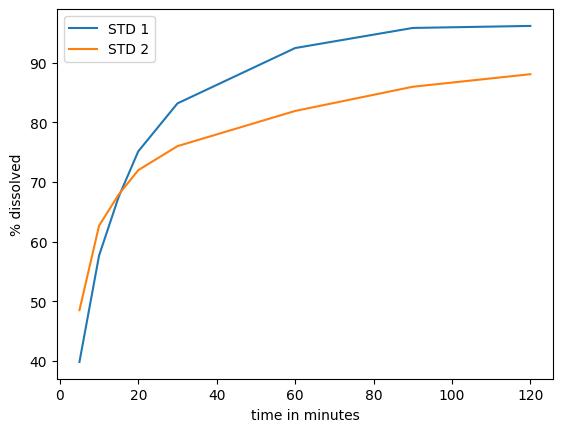

In [35]:
x_axis = [int(i) for i in list(std_1.columns)]
std_1_axis = list(std_1.mean(axis=0))
std_2_axis = list(std_2.mean(axis=0))
plt.plot(x_axis, std_1_axis, label='STD 1')
plt.plot(x_axis, std_2_axis, label='STD 2')
plt.xlabel('time in minutes')
plt.ylabel('% dissolved')
plt.legend()
plt.show()
plt.close()

In [39]:
time_points = list(std_1.columns)
P = len(time_points)

n = std_1.shape[0]
S1 = std_1.cov()
S2 = std_2.cov()
S_pooled = (S1 + S2) / 2


x2_x1 = list(std_1.mean(axis=0)[time_points] - std_2.mean(axis=0)[time_points])
a = np.array(x2_x1).reshape(len(time_points), 1)
K = n**2/(2*n)* (2*n - P - 1) / ((2*n - 2) * P)
Fcrit = scipy.stats.f.ppf(q=1-.1, dfn=P, dfd=2*n-P-1)
spinv = np.linalg.inv(S_pooled.loc[time_points , time_points])
D_M = np.sqrt(a.T @ spinv @ a)[0][0]
print('Mahalanobis distance between T and R:', D_M)


bound1 = a @ (1 + np.sqrt(Fcrit/(K * a.T @ spinv @ a)))
bound2 = a @ (1 - np.sqrt(Fcrit/(K * a.T @ spinv @ a)))
# 90% CI of Mahalanobis distance:
DM_1 = np.sqrt(bound1.T @ spinv @ bound1)[0][0]
DM_2 = np.sqrt(bound2.T @ spinv @ bound2)[0][0]
DM_upper = max(DM_1, DM_2)
DM_lower = min(DM_1, DM_2)

print('lower bound of DM:', DM_lower)
print('upper bound of DM:', DM_upper)

tolerance = 15 # assmume 15% is the criteria
for tolerance in [10, 11, 13, 15]:

    print('\n\ntolerance here:', tolerance, '%')

    D_g = np.array([tolerance] * len(time_points)).reshape(len(time_points), 1)
    RD = np.sqrt(D_g.T @ spinv @ D_g)[0][0]

    print(f'Maximum Mahalanobis distance at {tolerance}% tolerance: {RD:.3f}')
    if DM_upper <= RD:
        print(f'DM_upper {DM_upper:.3f} <= [{tolerance}% limit] {RD:.3f}, Similar')
    else:
        print(f'DM_upper {DM_upper:.3f} > [{tolerance}% limit] {RD:.3f} not similar')


Mahalanobis distance between T and R: 9.167244574421552
lower bound of DM: 2.3348569445636507
upper bound of DM: 15.999632204279443


tolerance here: 10 %
Maximum Mahalanobis distance at 10% tolerance: 7.108
DM_upper 16.000 > [10% limit] 7.108 not similar


tolerance here: 11 %
Maximum Mahalanobis distance at 11% tolerance: 7.818
DM_upper 16.000 > [11% limit] 7.818 not similar


tolerance here: 13 %
Maximum Mahalanobis distance at 13% tolerance: 9.240
DM_upper 16.000 > [13% limit] 9.240 not similar


tolerance here: 15 %
Maximum Mahalanobis distance at 15% tolerance: 10.661
DM_upper 16.000 > [15% limit] 10.661 not similar
